# Reducción de dimensionalidad

## PCA

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/home/linar/Desktop/ML/Clases/i302/TP4/data/MNIST_dataset.csv")
# Separar características (X) y etiquetas (y)
X_train = df.drop('label', axis=1)  # Características (todos los píxeles)
y_train = df['label']  # Etiquetas (números del 0 al 9)

# Verificar las dimensiones de X e y
print("*******************\nTRAIN\n*******************")
print("Dimensiones de X:", X_train.shape)
print("Dimensiones de y:", y_train.shape)

*******************
TRAIN
*******************
Dimensiones de X: (70000, 784)
Dimensiones de y: (70000,)


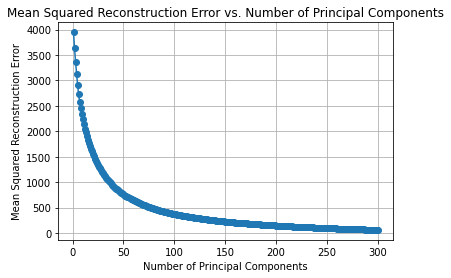

In [5]:
from PCA import PCA

train_errors = []
num_components_range = range(1, 301)  # Testing different numbers of principal components

for n_components in num_components_range:
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    X_train_transformed = pca.transform(X_train)
    X_train_reconstructed = pca.reconstruct(X_train_transformed)
    reconstruction_error = np.mean((X_train.values - X_train_reconstructed) ** 2)
    train_errors.append(reconstruction_error)

# Step 8: Plotting the mean squared reconstruction error
plt.plot(num_components_range, train_errors, marker='o')
plt.title('Mean Squared Reconstruction Error vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Reconstruction Error')
plt.grid(True)
plt.show()

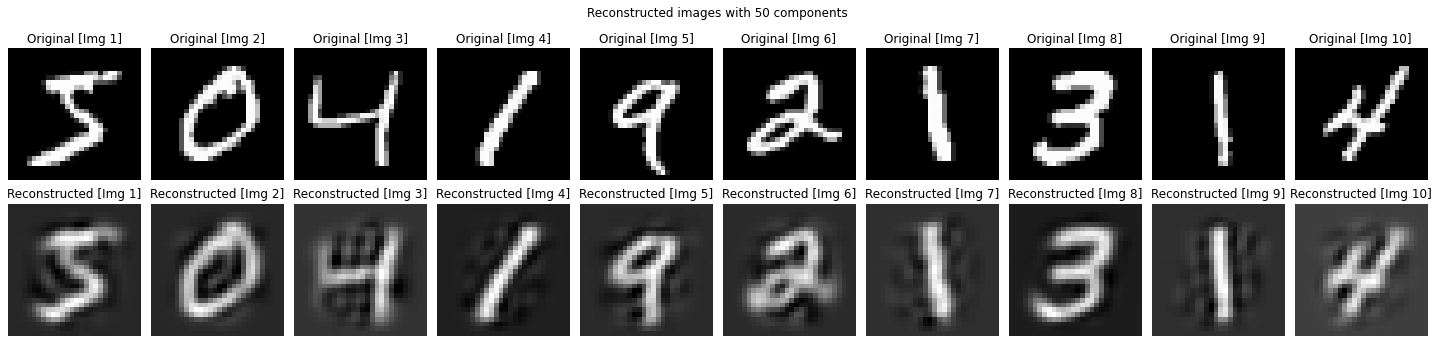

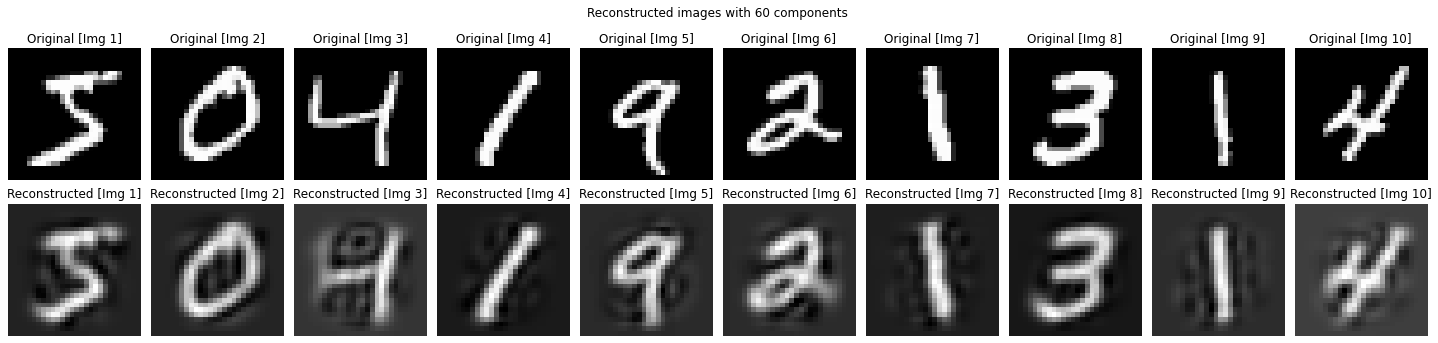

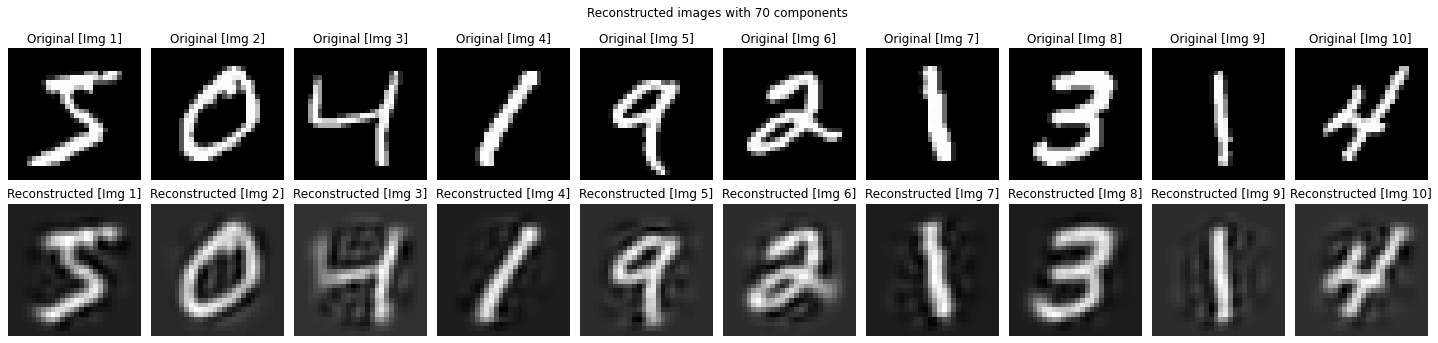

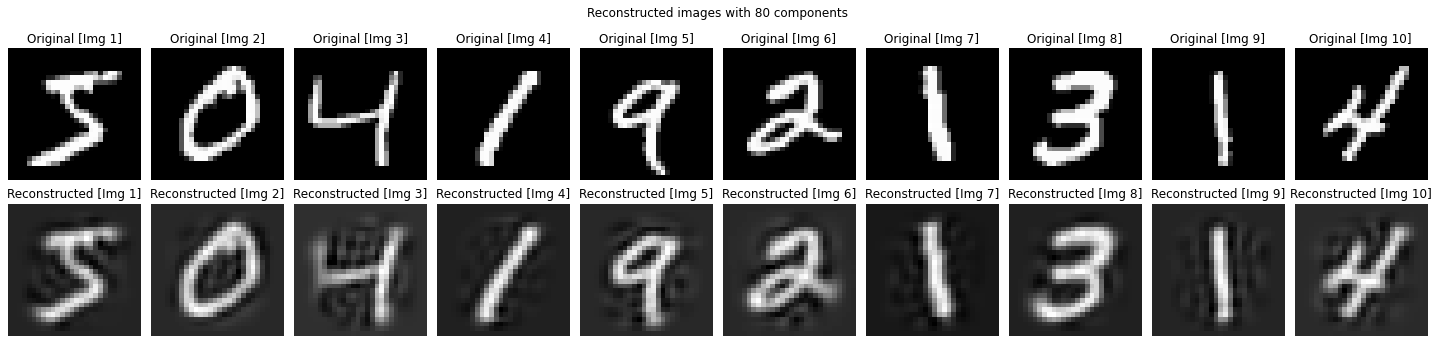

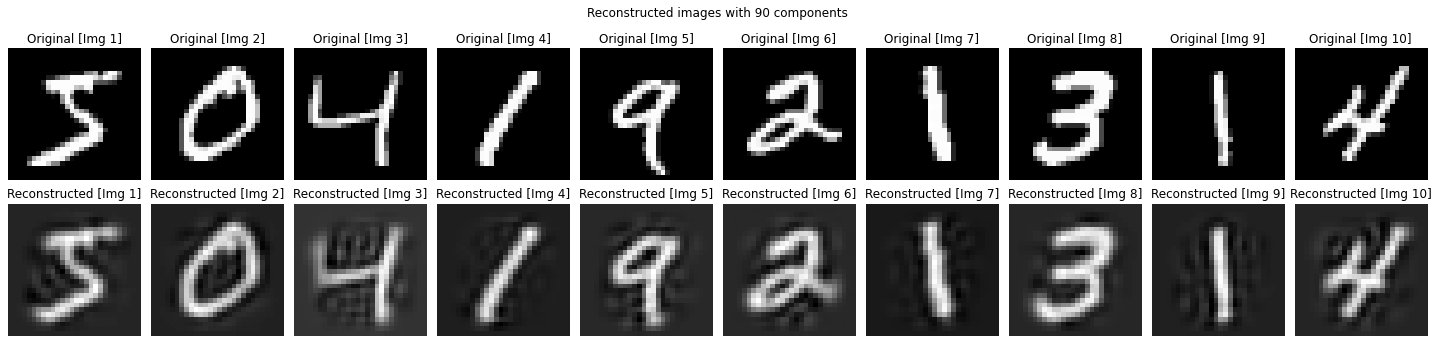

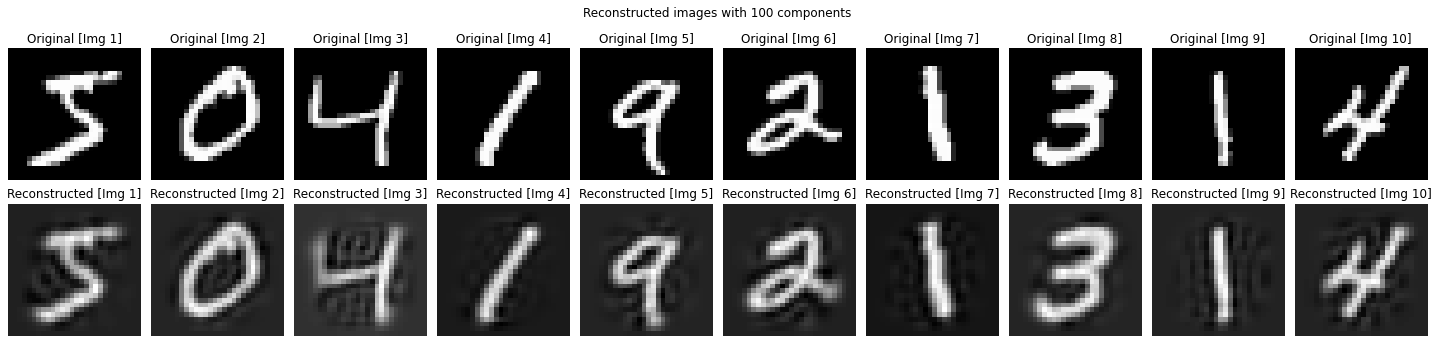

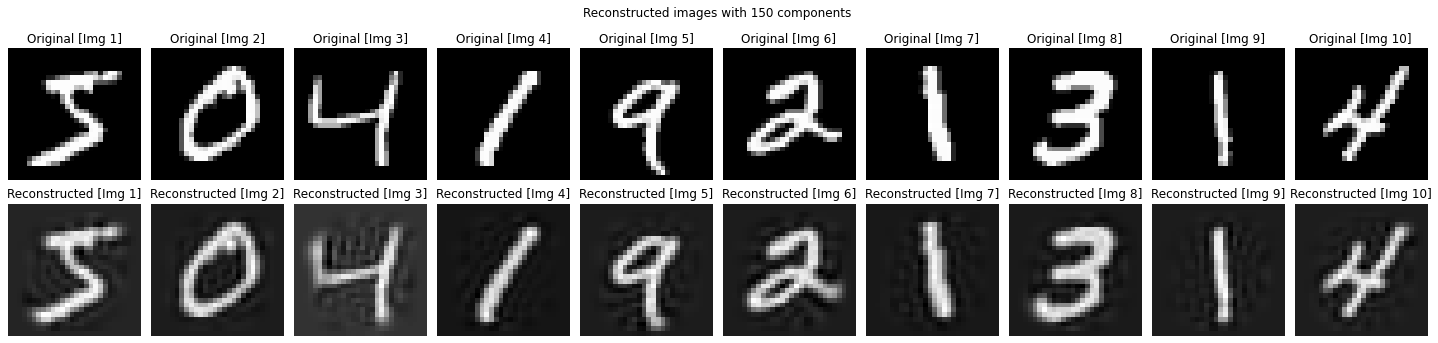

In [7]:
# Assuming you have chosen an appropriate number of principal components
chosen_components = [50,60,70,80,90,100,150]  

for n_comp in chosen_components:
    # Fit PCA with the chosen number of components
    pca = PCA(n_components=n_comp)
    pca.fit(X_train)
    fig, axes = plt.subplots(2, 10, figsize=(20, 5))

    for i in range(10):
        # Original image
        original_image = X_train.iloc[i].values.reshape(28, 28)
        ax_orig = axes[0, i]
        ax_orig.imshow(original_image, cmap='gray')
        ax_orig.axis('off')
        ax_orig.set_title(f"Original [Img {i+1}]")

        # Reconstructed image
        X_train_sample_transformed = pca.transform(X_train.iloc[[i]])
        X_train_sample_reconstructed = pca.inverse_transform(X_train_sample_transformed)
        X_train_sample_reconstructed = X_train_sample_reconstructed.reshape(28, 28)
        ax_recon = axes[1, i]
        ax_recon.imshow(X_train_sample_reconstructed, cmap='gray')
        ax_recon.axis('off')
        ax_recon.set_title(f"Reconstructed [Img {i+1}]")

    # Adjust layout for better spacing
    plt.suptitle(f"Reconstructed images with {n_comp} components")
    plt.tight_layout()
    plt.show()